In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

In [2]:
ames_housing = pd.read_csv('C:/Users/hamza/Downloads/Springboard Case Studies/Capstone Project 2/train.csv')
ames_housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
ames_housing_e = ames_housing.set_index('Id')
ames_housing_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Determining the columns with NaN, Null or zero values.

In [4]:
print (ames_housing_e.isin([' ','NULL','NaN']))

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                          
1          False     False        False    False   False  False     False   
2          False     False        False    False   False  False     False   
3          False     False        False    False   False  False     False   
4          False     False        False    False   False  False     False   
5          False     False        False    False   False  False     False   
...          ...       ...          ...      ...     ...    ...       ...   
1456       False     False        False    False   False  False     False   
1457       False     False        False    False   False  False     False   
1458       False     False        False    False   False  False     False   
1459       False     False        False    False   False  False     False   
1460       False     False        False    False   False  False     False   

In [5]:
print (ames_housing_e.isin([' ','NULL',0]).mean())

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 80, dtype: float64


Delete the columns with non-values greater than 50% of the total column values.

In [6]:
ames_housing_e = ames_housing_e.loc[:, ames_housing_e.isin([' ','NULL',0]).mean() < .5]
ames_housing_e = ames_housing_e.drop(columns="MiscFeature")
print (ames_housing_e)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... GarageCo

In [7]:
ames_housing_e.describe().round()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1379.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,57.0,70.0,10517.0,6.0,6.0,1971.0,1985.0,444.0,567.0,1057.0,...,1.0,7.0,1.0,1979.0,2.0,473.0,47.0,6.0,2008.0,180921.0
std,42.0,24.0,9981.0,1.0,1.0,30.0,21.0,456.0,442.0,439.0,...,0.0,2.0,1.0,25.0,1.0,214.0,66.0,3.0,1.0,79443.0
min,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1900.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,20.0,59.0,7554.0,5.0,5.0,1954.0,1967.0,0.0,223.0,796.0,...,1.0,5.0,0.0,1961.0,1.0,334.0,0.0,5.0,2007.0,129975.0
50%,50.0,69.0,9478.0,6.0,5.0,1973.0,1994.0,384.0,478.0,992.0,...,1.0,6.0,1.0,1980.0,2.0,480.0,25.0,6.0,2008.0,163000.0
75%,70.0,80.0,11602.0,7.0,6.0,2000.0,2004.0,712.0,808.0,1298.0,...,1.0,7.0,1.0,2002.0,2.0,576.0,68.0,8.0,2009.0,214000.0
max,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,5644.0,2336.0,6110.0,...,3.0,14.0,3.0,2010.0,4.0,1418.0,547.0,12.0,2010.0,755000.0


Determining the columns with numeric values within it (directly below) and categorical values (below numeric one).

In [8]:
cols = ames_housing_e.columns
num_cols = ames_housing_e._get_numeric_data().columns
print(num_cols.tolist())

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice']


In [9]:
categ_cols = list(set(cols) - set(num_cols))
print(categ_cols)

['GarageFinish', 'PoolQC', 'SaleType', 'LandSlope', 'KitchenQual', 'Heating', 'Electrical', 'RoofStyle', 'BsmtFinType2', 'GarageType', 'Utilities', 'MSZoning', 'LandContour', 'BsmtCond', 'Fence', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'Alley', 'Street', 'Foundation', 'CentralAir', 'BsmtFinType1', 'FireplaceQu', 'LotConfig', 'HeatingQC', 'Neighborhood', 'Functional', 'Condition1', 'MasVnrType', 'ExterQual', 'RoofMatl', 'PavedDrive', 'ExterCond', 'LotShape', 'HouseStyle', 'BldgType', 'GarageCond', 'SaleCondition', 'Condition2', 'GarageQual', 'BsmtExposure']


Determining columns that contains values that are empty.

In [10]:
emp_cols = ames_housing_e.columns[ames_housing_e.isna().any()].tolist()
print(emp_cols)

['LotFrontage', 'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']


Identifying values from numeric columns that also has empty values in the column.

In [11]:
set(num_cols).intersection(emp_cols)

{'GarageYrBlt', 'LotFrontage'}

Replace empty or non-values with median value.

In [12]:
ames_housing_e['GarageYrBlt'].fillna((ames_housing_e['GarageYrBlt'].median()), inplace=True)
ames_housing_e['LotFrontage'].fillna((ames_housing_e['LotFrontage'].median()), inplace=True)

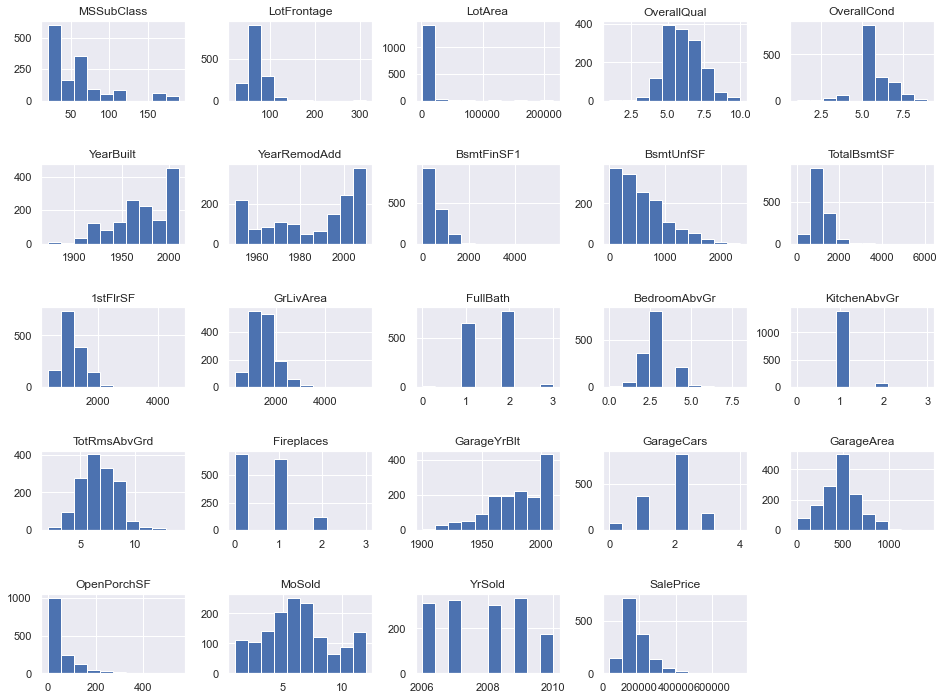

In [13]:
ames_housing_e.hist(figsize=(16,12))
plt.subplots_adjust(hspace=0.8)

***Plotted the correlation matrix heatmap.***

Correlation between various features


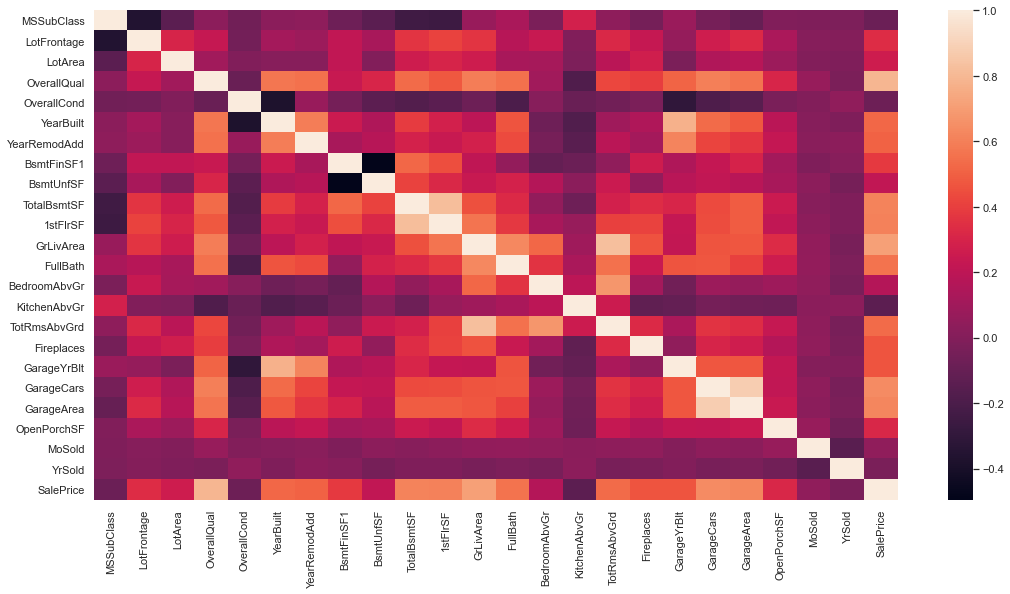

In [14]:
plt.figure(figsize=(18,9))
print('Correlation between various features')
p=sns.heatmap(ames_housing_e.corr())

In [15]:
ames_housing_e[categ_cols] = ames_housing_e[categ_cols].astype('category')
ames_housing_e[categ_cols] = ames_housing_e[categ_cols].apply(lambda x: x.cat.codes)

ames_housing_e[categ_cols]

,GarageFinish,PoolQC,SaleType,LandSlope,KitchenQual,Heating,Electrical,RoofStyle,BsmtFinType2,GarageType,...,PavedDrive,ExterCond,LotShape,HouseStyle,BldgType,GarageCond,SaleCondition,Condition2,GarageQual,BsmtExposure
Id,,,,,,,,,,,,,,,,,,,,,
1,1,-1,8,0,2,1,4,1,5,1,...,2,4,3,5,0,4,4,2,4,3
2,1,-1,8,0,3,1,4,1,5,1,...,2,4,3,2,0,4,4,2,4,1
3,1,-1,8,0,2,1,4,1,5,1,...,2,4,0,5,0,4,4,2,4,2
4,2,-1,8,0,2,1,4,1,5,5,...,2,4,0,5,0,4,0,2,4,3
5,1,-1,8,0,2,1,4,1,5,1,...,2,4,0,5,0,4,4,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1,-1,8,0,3,1,4,1,5,1,...,2,4,3,5,0,4,4,2,4,3
1457,2,-1,8,0,3,1,4,1,4,1,...,2,4,3,2,0,4,4,2,4,3
1458,1,-1,8,0,2,1,4,1,5,1,...,2,2,3,5,0,4,4,2,4,3


In [16]:
ames_data_nums = ames_housing_e.select_dtypes(['number'])

len(ames_data_nums) * .7, len(ames_data_nums) * .3

(1021.9999999999999, 438.0)

In [17]:
y = ames_housing_e.SalePrice

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ames_data_nums.drop(columns='SalePrice'), 
                                                    y, test_size=0.3, 
                                                    random_state=47)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1022, 65) (438, 65)
(1022,) (438,)


In [18]:
#Define pipeline comprising the steps: SimpleImputer() with a strategy of 'median'
#StandardScaler(), and then RandomForestRegressor() with a random state = 47

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

RF_pipe = make_pipeline(SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47))

In [19]:
#Call `cross_validate` to estimate pipeline's performance. Pass it random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [20]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.85920954, 0.85488069, 0.85428536, 0.87167347, 0.92041679])

In [21]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.872093169198066, 0.024958861813161128)

In [22]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']}
print(grid_params)

{'randomforestregressor__n_estimators': [10, 12, 16, 20, 26, 33, 42, 54, 69, 88, 112, 143, 183, 233, 297, 379, 483, 615, 784, 1000], 'standardscaler': [StandardScaler(), None], 'simpleimputer__strategy': ['mean', 'median']}


In [23]:
#Call `GridSearchCV` with random forest pipeline, pas `grid_params` dict for parameters to evaluate, 5-fold cross-validation,
#and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [24]:
#Call `GridSearchCV`'s `fit()` method with `X_train` & `y_train` as arguments to start grid search.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [25]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 183,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

It looks like imputing with the median helps, but scaling the features doesn't.

In [26]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.86351307, 0.86212713, 0.85699142, 0.87018584, 0.92002868])

In [27]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.8745692266427595, 0.02311622522598192)

Marginally improved upon the default CV results.

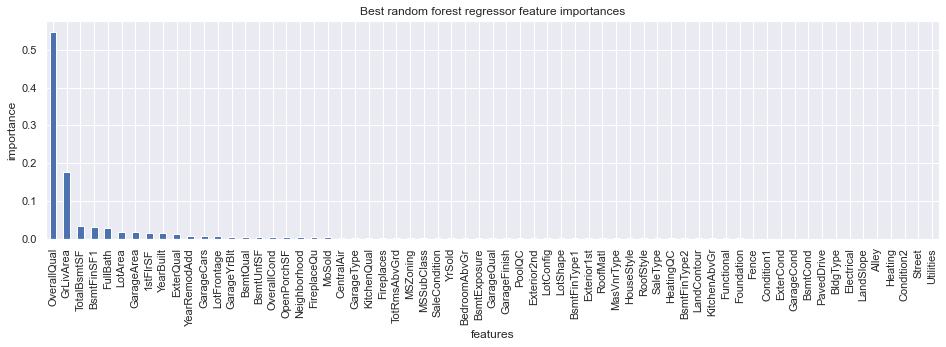

In [28]:
plt.subplots(figsize=(16, 4))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

# Reducing columns that have low feature importance

Removing column headers below 2% to gather the most important features.

In [31]:
#columns=['Variable','Importance']
rf_feat_imps_df = pd.DataFrame(rf_feat_imps.reset_index())
rf_feat_imps_df.columns = ['Variable','Importance']
rf_feat_imps_df['Importance_2'] = rf_feat_imps_df.Importance * 100

rf_feat_imps_df = rf_feat_imps_df[(rf_feat_imps_df['Importance_2'] < 2)]
rf_feat_imps_df.head()

,Variable,Importance,Importance_2
5,LotArea,0.018132,1.813216
6,GarageArea,0.016699,1.669902
7,1stFlrSF,0.014610,1.461008
8,YearBuilt,0.014505,1.450494
9,ExterQual,0.011980,1.197997


In [32]:
columns_to_drop = rf_feat_imps_df.Variable.tolist()
print(columns_to_drop)

['LotArea', 'GarageArea', '1stFlrSF', 'YearBuilt', 'ExterQual', 'YearRemodAdd', 'GarageCars', 'LotFrontage', 'GarageYrBlt', 'BsmtQual', 'BsmtUnfSF', 'OverallCond', 'OpenPorchSF', 'Neighborhood', 'FireplaceQu', 'MoSold', 'CentralAir', 'GarageType', 'KitchenQual', 'Fireplaces', 'TotRmsAbvGrd', 'MSZoning', 'MSSubClass', 'SaleCondition', 'YrSold', 'BedroomAbvGr', 'BsmtExposure', 'GarageQual', 'GarageFinish', 'PoolQC', 'Exterior2nd', 'LotConfig', 'LotShape', 'BsmtFinType1', 'Exterior1st', 'RoofMatl', 'MasVnrType', 'HouseStyle', 'RoofStyle', 'SaleType', 'HeatingQC', 'BsmtFinType2', 'LandContour', 'KitchenAbvGr', 'Functional', 'Foundation', 'Fence', 'Condition1', 'ExterCond', 'GarageCond', 'BsmtCond', 'PavedDrive', 'BldgType', 'Electrical', 'LandSlope', 'Alley', 'Heating', 'Condition2', 'Street', 'Utilities']


In [33]:
y = ames_housing_e.SalePrice
X = ames_housing_e.drop(['SalePrice'], axis=1)
X = X.drop(columns_to_drop, axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
RF_pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), RandomForestRegressor(random_state=47))

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

rf_cv_scores = rf_default_cv_results['test_score']
np.mean(rf_cv_scores), np.std(rf_cv_scores)
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']}

rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)
rf_grid_cv.fit(X_train, y_train)
rf_grid_cv.best_params_
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
np.mean(rf_best_scores), np.std(rf_best_scores)

(1022, 5) (438, 5)
(1022,) (438,)


(0.8478913785894328, 0.02696106843571441)

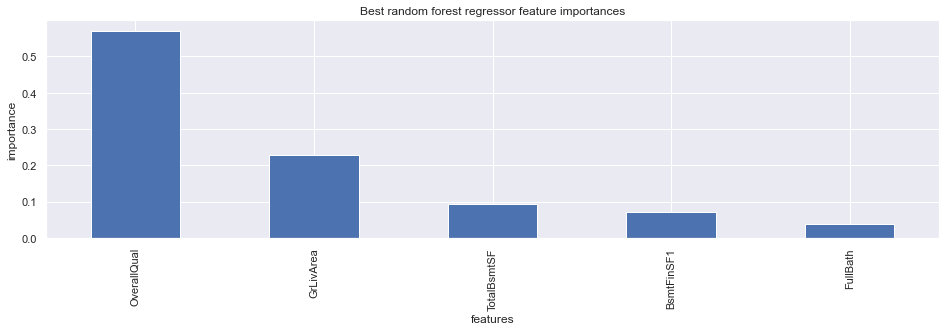

In [34]:
plt.subplots(figsize=(16, 4))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Encouragingly, the dominant top four features are in common with the linear model:

- Overall quality
- Above grade (ground) living area square feet
- Total square feet of basement area
- Type 1 finished square feet

In [36]:
from sklearn import __version__ as sklearn_version
import datetime
import os
import pickle

best_model = rf_grid_cv.best_estimator_
best_model.version = 1.0
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()
    
modelpath = '../models'
if not os.path.exists(modelpath):
    os.mkdir(modelpath)
skimodel_path = os.path.join(modelpath, 'ames_housing_pricing_model.pkl')
if not os.path.exists(skimodel_path):
    with open(skimodel_path, 'wb') as f:
        pickle.dump(best_model, f)